# Chapter 2. What is Market-Based Valuation ?

inner value of European call option
$$ h_T(S,K) = max[S_T - K, 0]$$

where, T : option 만기일, $S_T$: 만기일의 index level, K: strike price

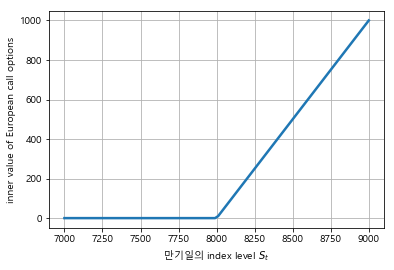

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

K = 8000                                       # option strike
S = np.linspace(7000, 9000, 100)  # index level value
h = np.maximum(S - K, 0)             # inner value of call option

plt.figure()
plt.plot(S, h, lw=2.5)
plt.xlabel('만기일의 index level $S_t$ ')
plt.ylabel('inner value of European call options')
plt.grid()

strike 9000, T(time to maturity) 1.0, risk-free short rate 0.0025, $\sigma$ = 0.2 인 유럽형 call option 의 Black-Sholes-Merton value 계산하여 plot 표시

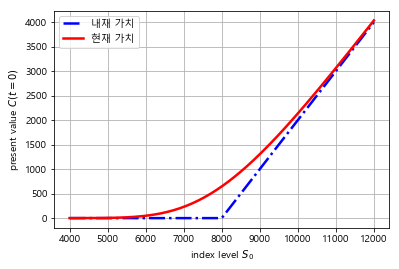

In [146]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')

from BSM_option_valuation import BSM_call_value

K = 8000         # strike price
T = 1.0            # time-to-maturity
r = 0.0025       # risk-free short rate
vol = 0.2         # 변동성

# sample data 생성
S = np.linspace(4000, 12000, 150)    # vector of index level values
h = np.maximum(S - K, 0)                # call option 의 inner value
c = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]   # call option 가치 계산

plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='내재 가치') 
plt.plot(S, c, 'r', lw=2.5, label='현재 가치')
plt.grid()
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$');

### 3.8.1 GBM Analysis

In [147]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')

In [148]:
# helper function
def dN(x, mu, sigma):
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi * sigma**2)
    return pdf

In [149]:
dN(0.4, 0, 1)

0.36827014030332333

In [150]:
from scipy.stats import norm
norm.pdf(0.4, loc=0, scale=1)   

0.36827014030332333

In [151]:
def simulate_gbm():
    # model parameters
    S0 = 100.0     # initial index level
    T   = 10.0       # time horizon (투자기간)
    r    = 0.05       # risk-less short rate
    vol = 0.2         # instantaneous volatility
    
    # simulation parameters
    np.random.seed(250000)
    gbm_dates = pd.DatetimeIndex(start='30-09-2004', end='30-09-2014', freq='B')
    M = len(gbm_dates)        # time steps
    I  = 1                  # index level path
    dt = 1 / 252.       # fixed for simplicity
    df = np.exp(-r * dt)        # discount factor
    
    # stock price path
    rand = np.random.standard_normal((M, I))
    S = np.zeros_like(rand)     # stock matrix
    S[0] = S0           # initial value
    for t in range(1, M):
        S[t] = S[t-1] * np.exp((r - vol**2 / 2) * dt + vol * rand[t] * np.sqrt(dt))

    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))
    
    # Realized Volatility
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
#     print(gbm['returns'] ** 2)
#     print(np.arange(len(gbm)))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm

In [152]:
#simulate_gbm()

In [153]:
def print_statistics(data):
    print('Return Sample Statistics')
    print("-------------------------------------------------------------------")
    print("Mean of Daily Log Returns {0:9.6f}".format(np.mean(data['returns'])))
    print("Std    of Daily Log Returns {0:9.6f}".format(np.std(data['returns'])))
    print("Mean of Annua. Log Returns {0:9.6f}".format(np.mean(data['returns']) * 252))
    print("Std    of Daily Log Returns {0:9.6f}".format(np.std(data['returns']) * np.sqrt(252)))
    print("-------------------------------------------------------------------")
    print("Skew of Sample Log Returns {0:9.6f}".format(scs.skew(data['returns'])))
    print("Skew Normal Test p-value {0:9.6f}".format(scs.skewtest(data['returns'])[1]))
    print("-------------------------------------------------------------------")
    print("Kurt of Sample Log Returns {0:9.6f}".format(scs.kurtosis(data['returns'])))
    print("Kurt Normal Test p-value {0:9.6f}".format(scs.kurtosistest(data['returns'])[1]))
    print("-------------------------------------------------------------------")
    print("Normal Test p-value {0:9.6f}".format(scs.normaltest(data['returns'])[1]))    
    print("-------------------------------------------------------------------")
    print("Realized volatility      {0:9.6f}".format(data['rea_vol'].iloc[-1]))
    print("Realized variance      {0:9.6f}".format(data['rea_var'].iloc[-1]))

In [154]:
data = simulate_gbm()
print_statistics(data)

Return Sample Statistics
-------------------------------------------------------------------
Mean of Daily Log Returns  0.000073
Std    of Daily Log Returns  0.012721
Mean of Annua. Log Returns  0.018422
Std    of Daily Log Returns  0.201944
-------------------------------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value  0.730950
-------------------------------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value  0.206628
-------------------------------------------------------------------
Normal Test p-value  0.424617
-------------------------------------------------------------------
Realized volatility       0.201947
Realized variance       0.040783


In [155]:
# Graphical Output
# daily quotes and log returns
def quotes_returns(data):
    plt.figure(figsize=(9,6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')
    
    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log return')
    plt.grid(True)
    plt.axis('tight')

def return_histogram(data):
    plt.figure(figsize=(9,5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, density=True)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, lw=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)
    
def return_qqplot(data):
    plt.figure(figsize=(9,5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('sample quantiles')
    
def realized_volatilty(data):
    plt.figure(figsize=(9,5))
    data['rea_vol'].plot()
    plt.ylabel('realized volatility')
    plt.grid(True)

def rolling_statistics(data):
    plt.figure(figsize=(11,8))
    plt.subplot(311)
    mr = data['returns'].rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    
    plt.subplot(312)
    vo = data['returns'].rolling(252).std() * np.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    
    plt.subplot(313)
    co = mr.rolling(252).corr(other=vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation(252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

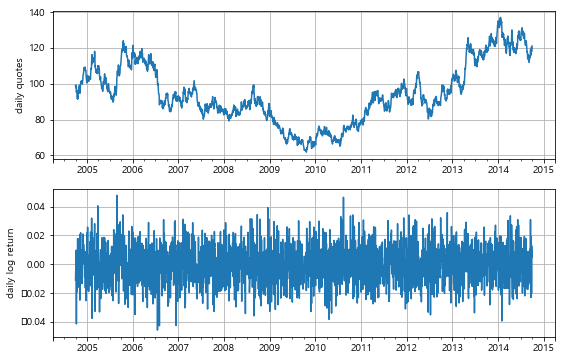

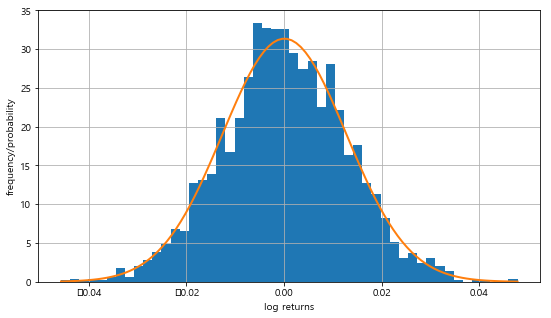

<Figure size 648x360 with 0 Axes>

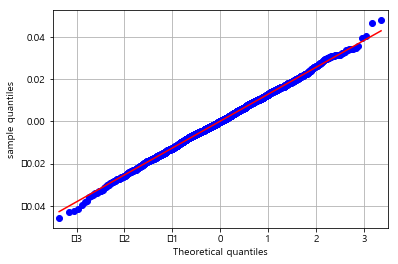

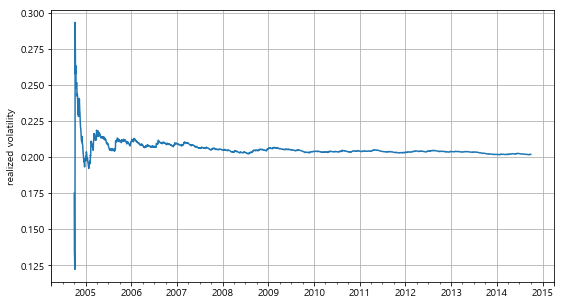

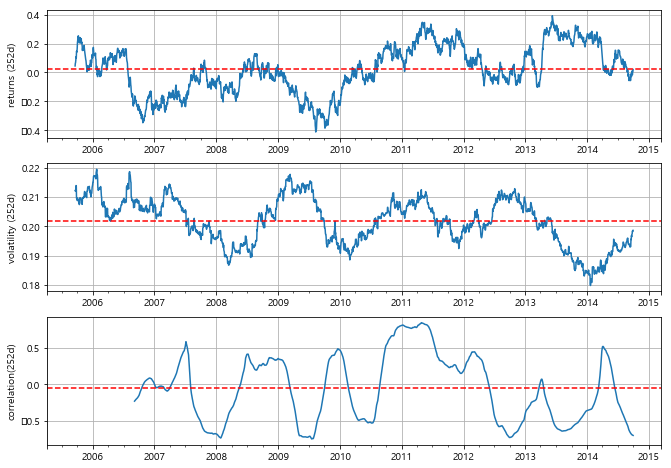

In [156]:
quotes_returns(data)
return_histogram(data)
return_qqplot(data)
realized_volatilty(data)
rolling_statistics(data)

### 3.8.2 DAX Analysis

In [157]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

def read_dax_data():
    # reads historical DAX data from google.
    start = pd.to_datetime('2004-10-01')
    end = pd.to_datetime('2014-09-30')            # Be cautious
    df = get_prices_data( [{'q': "DAX", 'x': "INDEXDB",}], "20Y")
    df.index = pd.to_datetime(df.index)
    DAX = pd.DataFrame(df['DAX_Close'].loc[start:end])
    DAX.rename(columns={'DAX_Close': 'index'}, inplace=True)
    DAX['returns'] = np.log(DAX['index'] / DAX['index'].shift(1))
    DAX['rea_var'] = 252 * np.cumsum(DAX['returns'] **2) / np.arange(len(DAX))
    DAX['rea_vol'] = np.sqrt(DAX['rea_var'])
    DAX = DAX.dropna()
    return DAX

def count_jumps(data, value):
    jumps = np.sum(np.abs(data['returns']) > value)
    return jumps

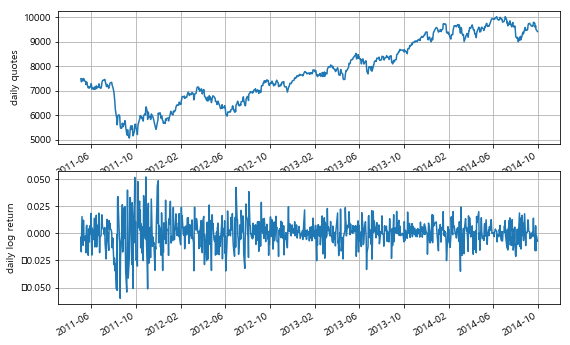

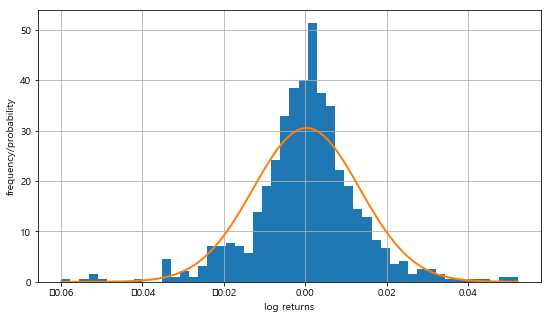

<Figure size 648x360 with 0 Axes>

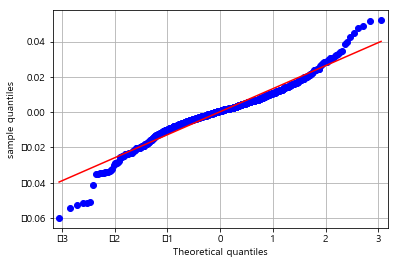

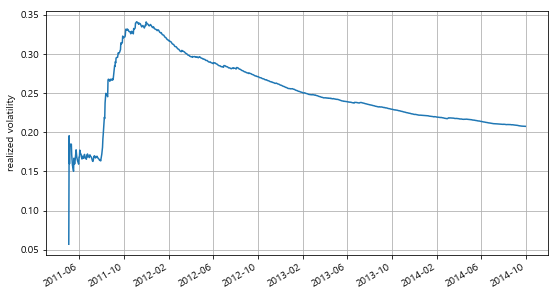

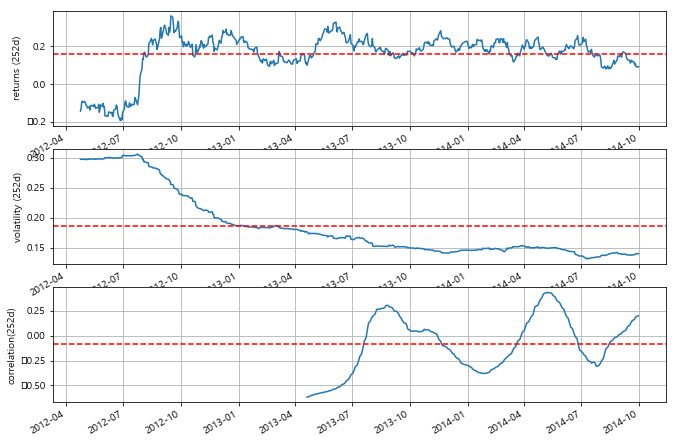

In [161]:
data = read_dax_data()
quotes_returns(data)
return_histogram(data)
return_qqplot(data)
realized_volatilty(data)
rolling_statistics(data)

In [160]:
print_statistics(data)

Return Sample Statistics
-------------------------------------------------------------------
Mean of Daily Log Returns  0.000258
Std    of Daily Log Returns  0.013072
Mean of Annua. Log Returns  0.065121
Std    of Daily Log Returns  0.207517
-------------------------------------------------------------------
Skew of Sample Log Returns -0.256511
Skew Normal Test p-value  0.002175
-------------------------------------------------------------------
Kurt of Sample Log Returns  2.818294
Kurt Normal Test p-value  0.000000
-------------------------------------------------------------------
Normal Test p-value  0.000000
-------------------------------------------------------------------
Realized volatility       0.207558
Realized variance       0.043080


In [162]:
count_jumps(data, 0.05)

8